# **Technical Challenge - Analista Sr. Applied Intelligence**
# Ejercicio 1
Sofía Cristina Aya Salazar

## 1. Importar paquetes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

## 2. Cargue de Datos

In [2]:
path = '/content/drive/MyDrive/Prueba MeLi/ofertas_relampago.csv'
data = pd.read_csv(path)

data_original = data.copy() # Se crea una copia para tener los datos sin modificaciones en el script

In [3]:
data.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


## 3. EDA

In [4]:
print(f"En primer lugar, se hace una revisión inicial de las variables. El dataset tiene {data.shape[0]: ,.0f} filas y {data.shape[1]} columnas. De estas, \
{len(data.describe().columns)} son numéricas y las {data.shape[1] - len(data.describe().columns)} restantes son categóricas y/o fechas.\n")

display(data.describe())

En primer lugar, se hace una revisión inicial de las variables. El dataset tiene  48,746 filas y 13 columnas. De estas, 4 son numéricas y las 9 restantes son categóricas y/o fechas.



,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


Del análisis descriptivo de las variables numéricas resalta el valor negativo **(-192)** del mínimo stock que queda remanente tras realizar la oferta relámpago. Esto se revisará más adelante.

Antes de entrar a analizar la calidad de la data, se hacen las revisiones/modificaciones necesarias en el tipo de datos

In [5]:
print("Tipos de datos originales:")
data.dtypes

Tipos de datos originales:


,0
OFFER_START_DATE,object
OFFER_START_DTTM,object
OFFER_FINISH_DTTM,object
OFFER_TYPE,object
INVOLVED_STOCK,int64
REMAINING_STOCK_AFTER_END,int64
SOLD_AMOUNT,float64
SOLD_QUANTITY,float64
ORIGIN,object
SHIPPING_PAYMENT_TYPE,object


In [6]:
# Fechas
col_fechas = ['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM']

for col in col_fechas:
  data[col] = pd.to_datetime(data[col])

In [7]:
print("Tipos de datos modificados:")
data.dtypes

Tipos de datos modificados:


,0
OFFER_START_DATE,datetime64[ns]
OFFER_START_DTTM,"datetime64[ns, UTC]"
OFFER_FINISH_DTTM,"datetime64[ns, UTC]"
OFFER_TYPE,object
INVOLVED_STOCK,int64
REMAINING_STOCK_AFTER_END,int64
SOLD_AMOUNT,float64
SOLD_QUANTITY,float64
ORIGIN,object
SHIPPING_PAYMENT_TYPE,object


### 3.1 Valores faltantes

Se hace la revisión de la cantidad de registros faltantes para cada una de las variables:

In [8]:
print(f"En todo el dataset hay un total de {data.isna().sum().sum(): ,.0f} registros nulos. Estos equivalen al {data.isna().sum().sum()/(data.shape[0]*data.shape[1]): .2%} \
de celdas vacías, repartidos de la siguiente manera:\n")

missing = pd.DataFrame(data.isna().sum(), columns=['faltantes'])
missing['porcentaje'] = missing['faltantes']/data.shape[0]
missing.sort_values(by='porcentaje', ascending=False)

En todo el dataset hay un total de  85,764 registros nulos. Estos equivalen al  13.53% de celdas vacías, repartidos de la siguiente manera:



,faltantes,porcentaje
ORIGIN,37430,0.767858
SOLD_AMOUNT,24167,0.495774
SOLD_QUANTITY,24167,0.495774
OFFER_START_DATE,0,0.000000
OFFER_START_DTTM,0,0.000000
OFFER_FINISH_DTTM,0,0.000000
OFFER_TYPE,0,0.000000
INVOLVED_STOCK,0,0.000000
REMAINING_STOCK_AFTER_END,0,0.000000
SHIPPING_PAYMENT_TYPE,0,0.000000


In [9]:
data['ORIGIN'].value_counts()

,count
ORIGIN,
A,11316


In [10]:
data[data['SOLD_AMOUNT'].isna()].head(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS


In [11]:
data[data['SOLD_QUANTITY'].isna()].head(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS


In [12]:
data[(data['SOLD_AMOUNT'].isna()) & (data['SOLD_QUANTITY'].isna())].shape

(24167, 13)

Haciendo un deep dive de las 3 variables con faltantes se observa que i) Origin solo toma 1 valor diferente cuando no es vacío -esto no nos proporciona mucha información- 2) En el caso de SOLD_AMOUNT y SOLD_QUANTITY los vacíos pueden entenderse como 0 ventas durante la oferta relámpago, por lo tanto, no es falta de información en sí 3) Hay consistencia en la cantidad de faltantes entre SOLD_AMOUNT y SOLD_QUANTITY, ya que si la cantidad vendida es 0 (en unidades), será 0 en dinero (ingresos)

### 3.2 Registros duplicados

In [13]:
# Se crea una columna para identificar las filas duplicadas (se marcan como 'True' todas las que se repiten, excepto la primera ocurrencia)
data.loc[:, 'duplicado'] = data.duplicated()
data['duplicado'].value_counts()

,count
duplicado,
False,47820
True,926


In [14]:
data[data['duplicado'] == True].sort_values(by='OFFER_START_DTTM').head(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,duplicado
39630,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,True
40012,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-SUNGLASSES,True
39640,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,True
40276,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 13:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-COMPUTER_MONITORS,True
39763,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 19:00:08+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,FOOTWEAR,APP & SPORTS,MLM-CLOGS_AND_MULES,True


In [15]:
data = data.drop('duplicado', axis=1)
data = data.drop_duplicates()
print(f"Se eliminan los duplicados, ya que estos representan las mismas ofertas relámpago, dejando un solo registro por cada una. De esta forma, \
el nuevo tamaño del dataset es {data.shape[0]: ,.0f} filas y las mismas {data.shape[1]} columnas.")

Se eliminan los duplicados, ya que estos representan las mismas ofertas relámpago, dejando un solo registro por cada una. De esta forma, el nuevo tamaño del dataset es  47,820 filas y las mismas 13 columnas.


### 3.3 Análisis univariado


>> Variable: OFFER_START_DATE
Las fechas van desde 2021-06-01 00:00:00 hasta 2021-07-31 00:00:00
Distribución:


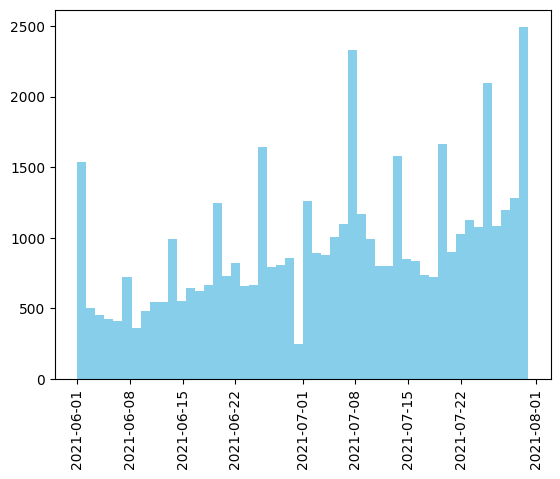


>> Variable: OFFER_START_DTTM
Las fechas van desde 2021-06-01 07:00:00+00:00 hasta 2021-07-31 19:00:00+00:00
Distribución:


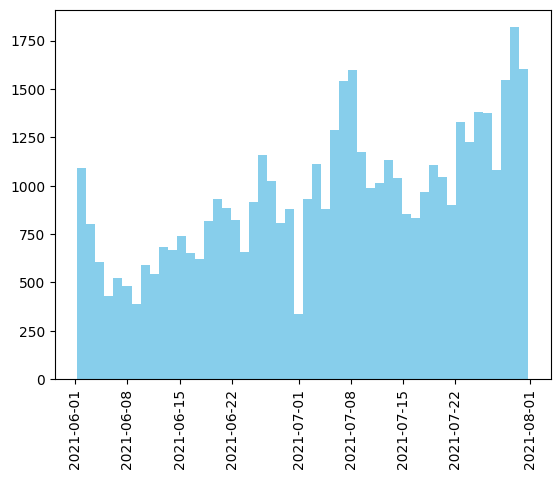


>> Variable: OFFER_FINISH_DTTM
Las fechas van desde 2021-06-01 07:00:00+00:00 hasta 2021-08-01 03:00:00+00:00
Distribución:


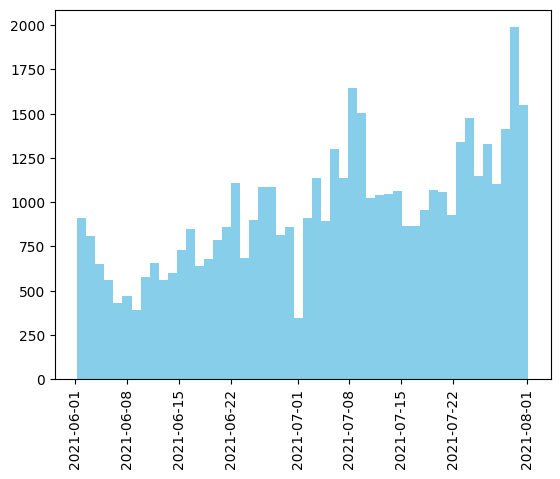


>> Variable: OFFER_TYPE


,count
OFFER_TYPE,
lightning_deal,47820



>> Variable: INVOLVED_STOCK
Los valores van desde  1.0 hasta  9,000.0
Distribución:


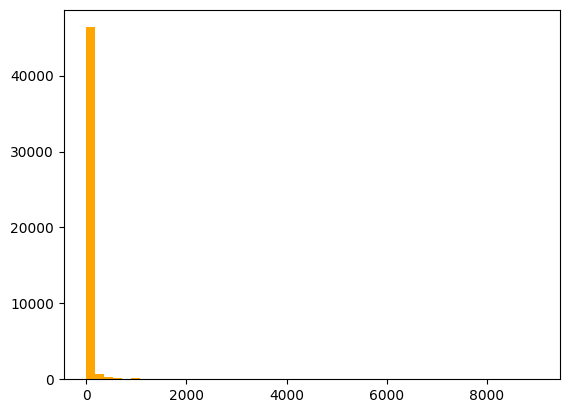


>> Variable: REMAINING_STOCK_AFTER_END
Los valores van desde -192.0 hasta  8,635.0
Distribución:


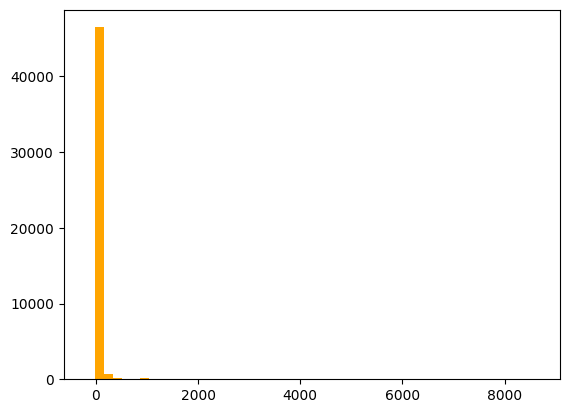


>> Variable: SOLD_AMOUNT
Los valores van desde  0.3 hasta  4,836.6
Distribución:


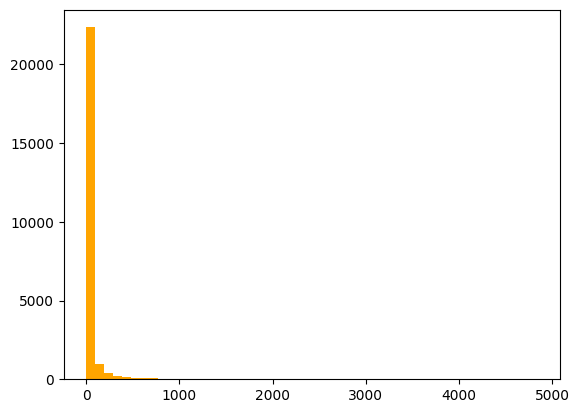


>> Variable: SOLD_QUANTITY
Los valores van desde  1.0 hasta  1,646.0
Distribución:


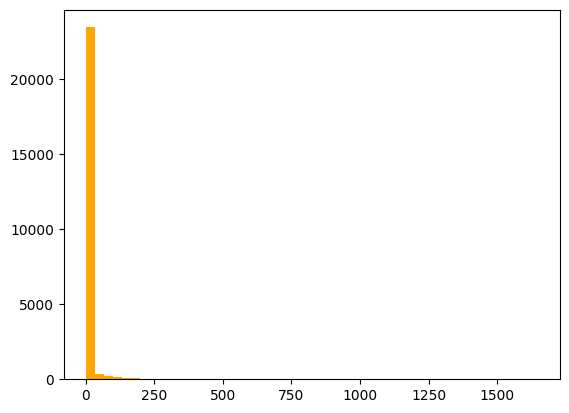


>> Variable: ORIGIN


,count
ORIGIN,
A,10845



>> Variable: SHIPPING_PAYMENT_TYPE


,count
SHIPPING_PAYMENT_TYPE,
free_shipping,25995
none,21825



>> Variable: DOM_DOMAIN_AGG1


,count
DOM_DOMAIN_AGG1,
HOME&DECOR,6637
APPAREL ACCESORIES,4315
APPAREL,3814
COMPUTERS,3661
SPORTS,3263
PHARMACEUTICS,3014
PERSONAL CARE,2960
ELECTRONICS,2922
MOBILE,1790



>> Variable: VERTICAL


,count
VERTICAL,
APP & SPORTS,13065
HOME & INDUSTRY,10822
CE,8373
BEAUTY & HEALTH,7068
CPG,2631
ACC,2553
T & B,2534
ENTERTAINMENT,498
OTHERS,276



>> Variable: DOMAIN_ID


,count
DOMAIN_ID,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,1757
MLM-HEADPHONES,750
MLM-LED_STRIPS,512
MLM-SUNGLASSES,455
MLM-VEHICLE_LED_BULBS,454
...,...
MLM-DRILL_CHUCKS,1
MLM-DINING_TABLES,1
MLM-TOY_DRUMS,1


In [16]:
for col in data.columns:
  # Para las fechas se mira el rango de tiempo y se visualiza la distribución
  if (data[col].dtypes == 'datetime64[ns]') or (data[col].dtypes == 'datetime64[ns, UTC]'):
    print(f"\n>> Variable: {col}")
    print(f"Las fechas van desde {data[col].min()} hasta {data[col].max()}")
    print("Distribución:")
    p = plt.hist(data[col], bins=50, color="skyblue")
    plt.xticks(rotation='vertical')
    plt.show()

  # Para las variables numéricas se mira el rango de valores y se visualiza la distribución
  elif (data[col].dtypes == 'int64') or (data[col].dtypes == 'float64'):
    print(f"\n>> Variable: {col}")
    print(f"Los valores van desde {data[col].min(): ,.1f} hasta {data[col].max(): ,.1f}")
    print("Distribución:")
    p = plt.hist(data[col], bins=50, color="orange")
    plt.show()

  # Para las variables categóricas/texto se revisa la cantidad de veces que se repite cada valor
  else:
    print(f"\n>> Variable: {col}")
    display(data[col].value_counts())

In [17]:
print(f"DOM_DOMAIN_AGG1: {data['DOM_DOMAIN_AGG1'].nunique()} valores únicos")
print(f"VERTICAL: {data['VERTICAL'].nunique()} valores únicos")
print(f"DOMAIN_ID: {data['DOMAIN_ID'].nunique()} valores únicos")

DOM_DOMAIN_AGG1: 36 valores únicos
VERTICAL: 9 valores únicos
DOMAIN_ID: 1266 valores únicos


1. De las gráficas de las variables tipo fecha se evidencia que estas tienen distribuciones muy similares, lo cual se alinea con el comportamiento esperado. Los valores mínimos y máximos permiten entender que las ventas relámpago del
dataset ocurrieron entre junio y julio del 2021
  *   Resalta que el 1 de julio el número de ofertas es significativamente menor a los demás días, especialmente comparándolo con los días cercanos  (final de junio y primeros días de julio). Valdría la pena validar si algo ocurrió ese día con el sistema, si se trata de un día feriado o algún tipo de particularidad que explique el cambio en el comportamiento

2. En las variables numéricas (INVOLVED_STOCK, REMAINING_STOCK_AFTER_END, SOLD_AMOUNT, SOLD_QUANTITY) las gráficas nos permiten observar que si bien los valores máximos están por encima de 1,000 (hasta 9,000 en INVOLVED_STOCK), la mayoría de registros se concentran en los niveles más bajos. Por esta razón, no se puede ver bien la forma de la distribución y se analizarán a mayor profundidad en las siguientes celdas del script.
  *   Adicionalmente, al revisar el describe() inicial se observa que el 75% de los datos para estas 4 columnas está por debajo de 30. Esto permite intuir que los valores > 1,000 son en realidad _outliers_ -bien sea un error en la data o casos particulares de las ofertas que sí ocurren pero no comúnmente- y, por lo tanto, se hará una mejor revisión de los percentiles

3. En cuanto a las variables categóricas (texto) se tiene:
  *   La variable ORIGIN solo toma el valor A (o vacío) como se comentó anteriormente
  *   SHIPPING_PAYMENT_TYPE hace referencia a si el envío fue o no gratis. De esta variable sería interesante analizar la relación que tiene con las ventas. Sin embargo, en cuanto a la distribución, lo único que se evidencia es que el ~54% de los registros ofrecieron envío gratis
  *   Hay 1,266 productos únicos (DOMAIN_ID), algunos de los cuales tuvieron una única franja de ofertas relámpago, mientras que otros como MLM-SURGICAL_AND_INDUSTRIAL_MASKS aparecen en más de 1,700 registros
  *   Dichos productos pertenecen a uno de los 36 dominios agrupados (DOM_DOMAIN_AGG1), que a su vez hacen parte de las 9 verticales (VERTICAL) existentes en el dataset
  *   La variable OFFER_TYPE tiene un único posible valor (lightning_deal) como era de esperarse, pues se trata de un subset de los datos que solo corresponde a las ofertas relámpago





>> Variable: INVOLVED_STOCK


,Percentil,Valor
0,0%,1.0
1,50%,10.0
2,75%,15.0
3,90%,30.0
4,95%,100.0
5,98%,250.0
6,100%,9000.0


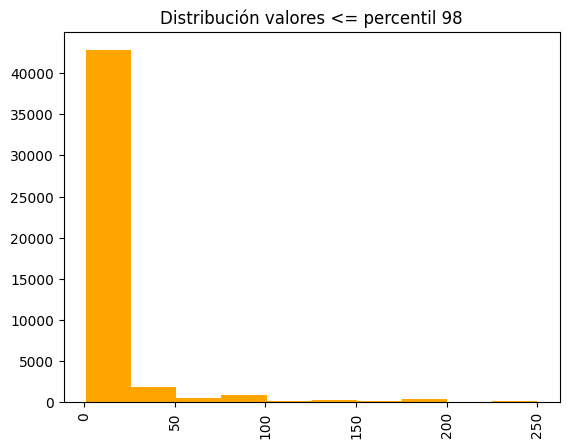

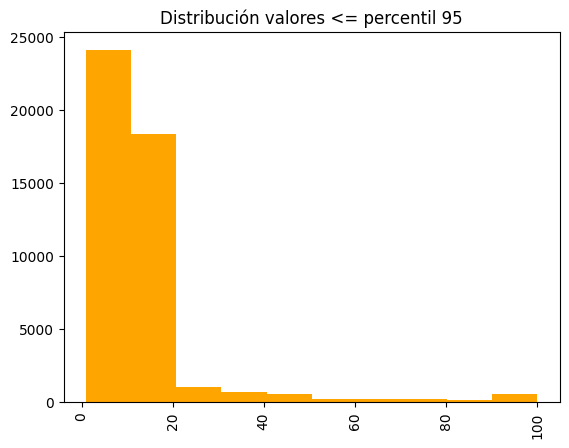


>> Variable: REMAINING_STOCK_AFTER_END


,Percentil,Valor
0,0%,-192.0
1,50%,8.0
2,75%,15.0
3,90%,24.0
4,95%,79.0
5,98%,200.0
6,100%,8635.0


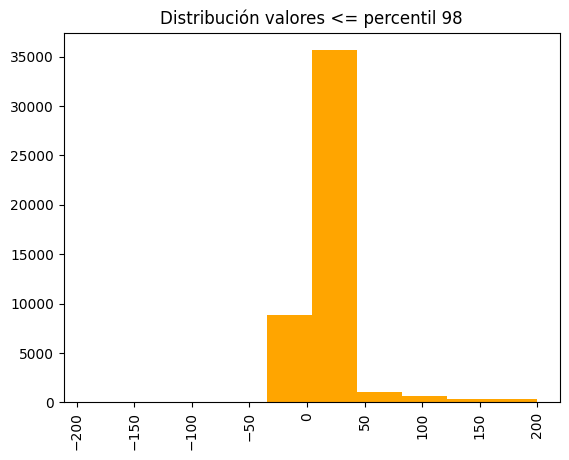

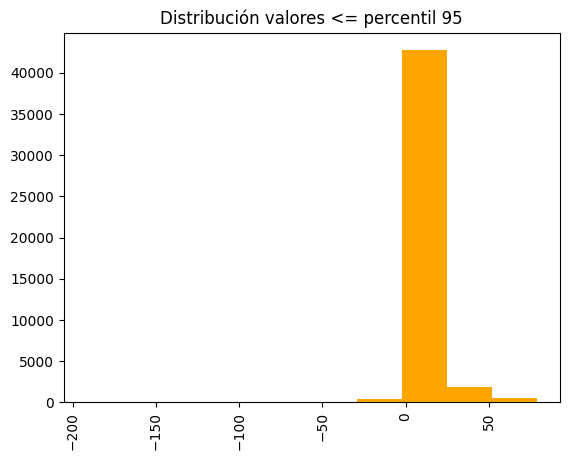


>> Variable: SOLD_AMOUNT


,Percentil,Valor
0,0%,0.2800
1,50%,12.4150
2,75%,30.8825
3,90%,86.7990
4,95%,196.7255
5,98%,487.5330
6,100%,4836.5700


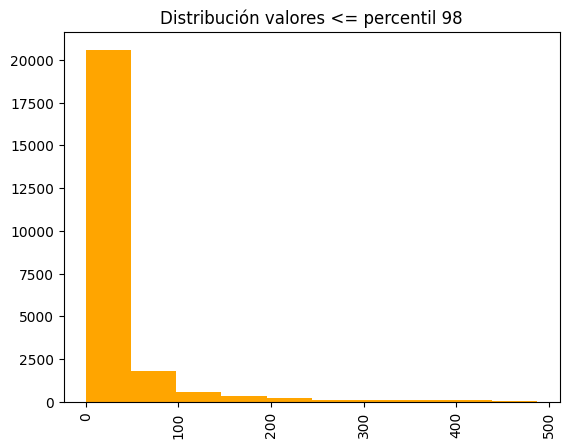

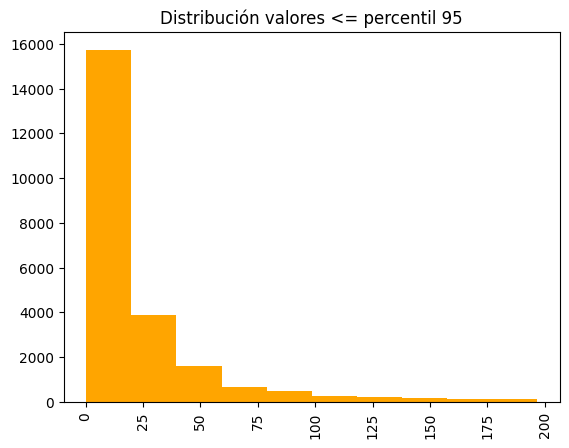


>> Variable: SOLD_QUANTITY


,Percentil,Valor
0,0%,1.0
1,50%,3.0
2,75%,6.0
3,90%,15.0
4,95%,25.0
5,98%,107.0
6,100%,1646.0


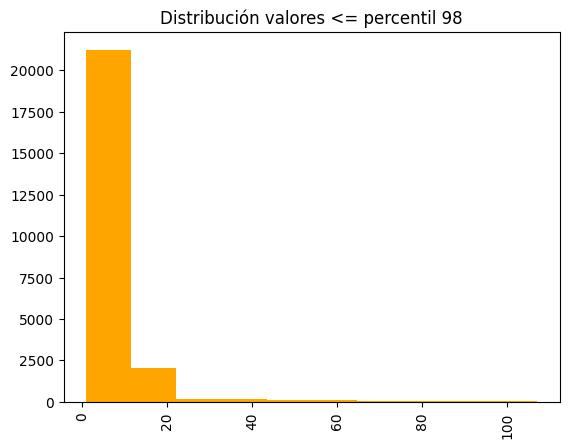

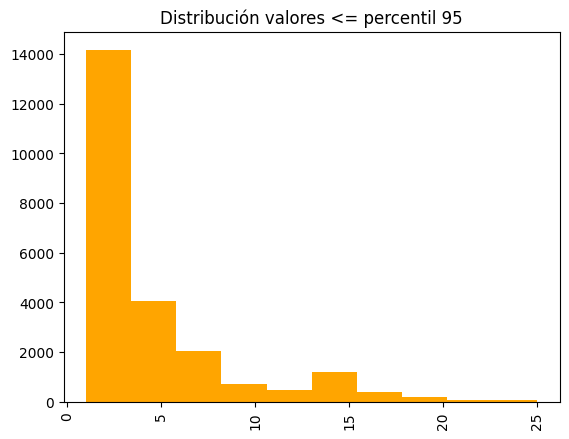

In [18]:
 for col in data.columns:
  # Para las variables numéricas se mira la distribución hasta el percentil 98. De esta manera, no se consideran los valores altos
  # que generaban problemas en la visualización anterior
  if (data[col].dtypes == 'int64') or (data[col].dtypes == 'float64'):
    print(f"\n>> Variable: {col}")
    percentiles = [0, 50, 75, 90, 95, 98, 100]
    tabla_percentiles = data[col].quantile([p / 100 for p in percentiles])
    tabla_percentiles = pd.DataFrame({'Percentil': [f"{p}%" for p in percentiles], 'Valor': tabla_percentiles.values})
    display(tabla_percentiles)
    p = plt.hist(data.loc[data[col]<=data[col].quantile(0.98), [col]], color="orange")
    plt.xticks(rotation='vertical')
    plt.title("Distribución valores <= percentil 98")
    plt.show()
    p = plt.hist(data.loc[data[col]<=data[col].quantile(0.95), [col]], color="orange")
    plt.xticks(rotation='vertical')
    plt.title("Distribución valores <= percentil 95")
    plt.show()

In [19]:
data.loc[(data['SOLD_QUANTITY']>107), ['VERTICAL', 'DOM_DOMAIN_AGG1']].drop_duplicates().sort_values(by='VERTICAL')

,VERTICAL,DOM_DOMAIN_AGG1
3965,APP & SPORTS,SPORTS
23853,APP & SPORTS,APPAREL
30098,APP & SPORTS,APPAREL ACCESORIES
468,BEAUTY & HEALTH,PHARMACEUTICS
1505,BEAUTY & HEALTH,BEAUTY EQUIPMENT
11226,CE,ELECTRONICS
32275,CE,COMPUTERS
43923,CE,MOBILE
9986,HOME & INDUSTRY,INDUSTRY


In [20]:
data[data['REMAINING_STOCK_AFTER_END']<=0].sort_values(by='REMAINING_STOCK_AFTER_END')

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
32275,2021-07-15,2021-07-15 19:00:00+00:00,2021-07-15 21:50:19+00:00,lightning_deal,15,-192,893.26,207.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
11448,2021-07-27,2021-07-27 12:00:00+00:00,2021-07-27 15:50:59+00:00,lightning_deal,124,-81,681.59,205.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES
41045,2021-06-15,2021-06-15 13:00:00+00:00,2021-06-15 13:26:57+00:00,lightning_deal,5,-70,60.86,65.0,NaN,none,TOYS AND GAMES,T & B,MLM-TOYS_AND_GAMES
45648,2021-07-26,2021-07-26 22:00:00+00:00,2021-07-26 23:05:13+00:00,lightning_deal,200,-41,801.61,241.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES
33627,2021-06-28,2021-06-28 13:00:00+00:00,2021-06-28 14:04:09+00:00,lightning_deal,15,-40,11.31,8.0,NaN,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,2021-07-07,2021-07-07 19:00:00+00:00,2021-07-07 22:53:48+00:00,lightning_deal,5,0,43.65,5.0,NaN,free_shipping,MOBILE,CE,MLM-SMARTWATCHES
25358,2021-06-20,2021-06-20 13:00:00+00:00,2021-06-20 15:35:29+00:00,lightning_deal,5,0,6.50,5.0,NaN,none,APPAREL ACCESORIES,APP & SPORTS,MLM-BODY_SHAPERS
25371,2021-06-20,2021-06-20 19:00:00+00:00,2021-06-20 23:03:29+00:00,lightning_deal,15,0,84.89,15.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-LIGHT_BULBS
8719,2021-07-07,2021-07-07 19:00:00+00:00,2021-07-08 00:11:46+00:00,lightning_deal,5,0,17.81,5.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-TABLE_AND_DESK_LAMPS


Una vez se revisan los datos sin considerar el 2%-5% en la cola derecha, se obtienen las siguientes conclusiones:
1. La mayor parte de las ofertas relámpago manejan stocks bajos (90% del INVOLVED_STOCK por debajo de 30), lo cual estratégicamente hace sentido: se genera un sentido de urgencia al haber unidades limitadas a buen precio, se sale de stock de elementos que quizá no tenían tanta rotación y/o se generan ventas con menor margen de ganancia pero solo para una cantidad limitada de objetos

2. Hay una cantidad importante de registros (4200+) con un REMAINING_STOCK_AFTER_END negativo. Esto puede tener dos explicaciones:
  *   Hubo un error al momento de hacer el cálculo del inventario o un problema en el cargue de la información. En cualquier caso tocaría entrar a hacer una revisión de las ventas reales con otra fuente/recurso
  *   Los registros que estamos viendo contemplan información por fuera de las ofertas relámpago (problema de consistencia). Por ejemplo, en la fila 33627 se tiene un INVOLVED_STOCK de 15, 8 unidades vendidas (SOLD_QUANTITY) y un REMAINING_STOCK_AFTER_END de -40. Restando las ventas del inventario disponible para la oferta se tendría un valor final de 7 y no de -40; sin embargo, podría suceder que dicho inventario (-40) refleje las ventas no solo relámpago sino también a precio full y en tal caso el problema sería combinar registros de dos contextos distintos

3. En cuanto al SOLD_AMOUNT y SOLD_QUANTITY se puede observar consistencia con los hallazgos del INVOLVED_STOCK. En el 98% de los registros se tratan productos en un orden de magnitud de 100 unidades, equivalente a ~$500 (en unidades monetarias), pero hay un 2% con valores mucho mayores
  *   Aquí vale la pena analizar si los productos en estos rangos suelen tener un stock y ventas significativamente superiores a los demás, o si se trata de un error en la inputación. Para esto, se podrían revisar valores históricos, así como el conocimiento del negocio que permita saber si dichos IDs de las categorías de "deporte", "belleza", "electrónicos" y "hogar e industria" realmente tuvieron los valores aquí registrados




### 3.4 Relación entre variables

Correlación entre variables numéricas:


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
INVOLVED_STOCK,1.000000,0.994227,0.405833,0.557970
REMAINING_STOCK_AFTER_END,0.994227,1.000000,0.354256,0.484301
SOLD_AMOUNT,0.405833,0.354256,1.000000,0.709112
SOLD_QUANTITY,0.557970,0.484301,0.709112,1.000000


<Axes: >

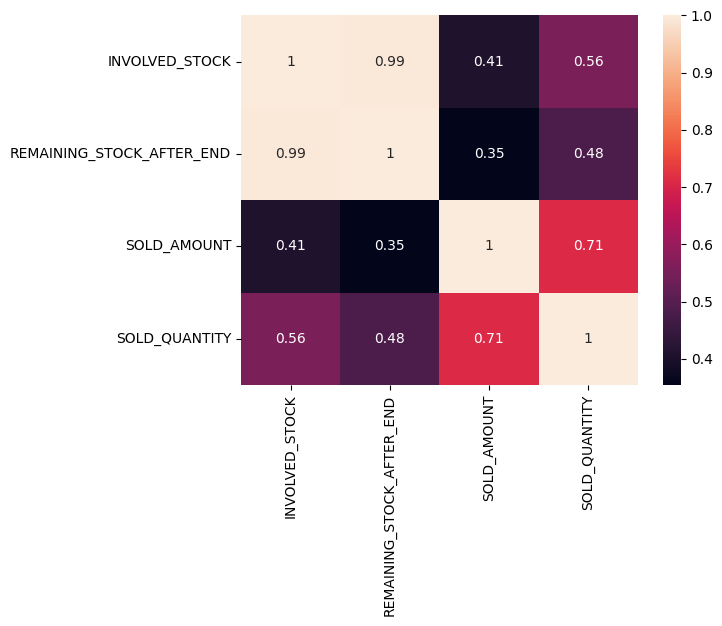

In [21]:
print("Correlación entre variables numéricas:")
display(data.corr(numeric_only=True))

sns.heatmap(data.corr(numeric_only=True), annot=True)

1. Como era de esperarse, hay una alta correlación entre SOLD_QUANTITY y SOLD_AMOUNT, pues el dinero recibido depende directamente de la cantidad de unidades vendidas

2. Igualmente, se nota una correlación de 0.99 entre INVOLVED_STOCK y REMAINING_STOCK_AFTER_END. De nuevo, esto es algo que se espera ya que el inventario remanente depende directamente del inventario inicial

3. Dependiendo del uso que se vaya a tener para estos datos, la correlación puede jugar un papel importante y podría llevar a que se seleccionen unas variables sobre otras o se creen adicionales. De cualquier manera, es importante entender la relación entre los datos

El día que más se vendió fue el 2021-07-14 00:00:00, con un total de $ 39,944.98


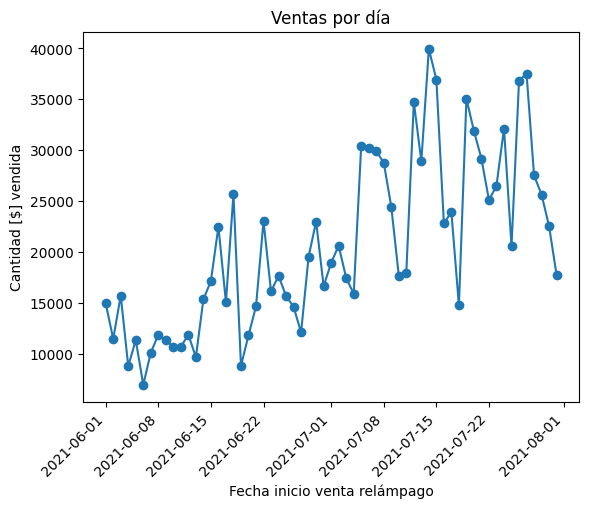

In [22]:
# Relación entre fechas y cantidad (dinero) vendido
ventas_por_dia = data.groupby('OFFER_START_DATE')['SOLD_AMOUNT'].sum().reset_index()

print(f"El día que más se vendió fue el {ventas_por_dia['OFFER_START_DATE'][ventas_por_dia['SOLD_AMOUNT'].idxmax()]}, con \
un total de ${ventas_por_dia['SOLD_AMOUNT'].max(): ,.2f}")

plt.plot_date(ventas_por_dia['OFFER_START_DATE'], ventas_por_dia['SOLD_AMOUNT'], linestyle='-')
plt.xlabel('Fecha inicio venta relámpago')
plt.ylabel('Cantidad [$] vendida')
plt.title('Ventas por día')
plt.xticks(rotation=45, ha='right')
plt.show()

De la gráfica anterior se evidencia que si bien el máximo ocurrió el 14 de julio, en general hay una tendencia positiva (en las fechas más recientes se vendió más). Además, se observa un tipo de estacionalidad recurrente, en donde las ventan aumentan hasta un pico, a partir del cual empiezan a disminuir y esto se repite a lo largo del tiempo

In [23]:
# Revisión relación entre dominios agrupados de productos y las verticales
pd.crosstab(index= data['VERTICAL'], columns=data['DOM_DOMAIN_AGG1'])

DOM_DOMAIN_AGG1,ACC TOOLS,AGRO,ANTIQUES & HOBBIES,APPAREL,APPAREL ACCESORIES,AUTOPARTS,BABY,BATTERIES,BEAUTY EQUIPMENT,"BOOKS, MULTIMEDIA & OTHER E!",CLEANING,COMPUTERS,DRINKS,ELECTRONICS,FOODS,FOOTWEAR,HOME&DECOR,INDUSTRY,MOBILE,MOTOPARTS,MUSICAL INSTRUMENTS,OTHER,PARTY,PERSONAL CARE,PERSONAL HYGIENE,PET PRODUCTS,PETS FOOD,PHARMACEUTICS,SECURITY,SPORTS,STATIONARY,SUPLEMENTS,TOOLS AND CONSTRUCTION,TOYS AND GAMES,VEHICULAR MULTIMEDIA,WHEELS & TIRES
VERTICAL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC,95,1,0,0,0,1691,0,0,0,0,0,0,0,0,0,0,0,0,0,631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,33
APP & SPORTS,0,0,0,3814,4315,0,0,0,0,0,0,0,0,0,0,1482,0,0,0,0,0,0,0,0,0,0,0,0,0,3263,0,191,0,0,0,0
BEAUTY & HEALTH,0,0,0,0,0,0,0,0,1094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2960,0,0,0,3014,0,0,0,0,0,0,0,0
CE,0,0,0,0,0,0,0,0,0,0,0,3661,0,2922,0,0,0,0,1790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CPG,0,0,0,0,0,0,0,99,0,0,356,0,62,0,847,0,0,0,0,0,0,0,0,0,820,0,447,0,0,0,0,0,0,0,0,0
ENTERTAINMENT,0,0,0,0,0,0,0,0,0,474,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HOME & INDUSTRY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6637,1162,0,0,0,0,0,0,0,0,0,0,320,0,1246,0,1457,0,0,0
OTHERS,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,254,0,0,0,0,0,0,0,0,0,0
T & B,0,0,0,0,0,0,765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,394,0,0,0,0,0,0,0,0,0,0,1375,0,0


Con el fin de validar la calidad de la data, se revisó que cada dominio pertenezca a una sola vertical y efectivamente esto es lo que ocurre

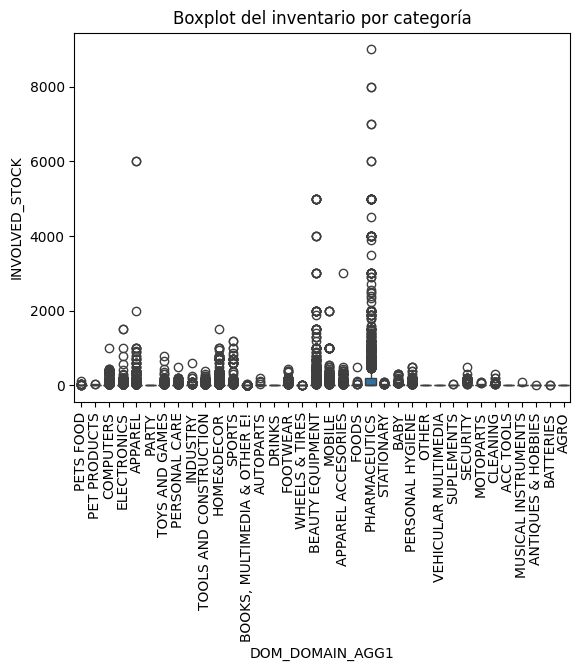

In [24]:
# Revisión relación entre dominio agrupado y el inventario incluido en las ofertas relámpago
sns.boxplot(x=data['DOM_DOMAIN_AGG1'], y=data['INVOLVED_STOCK'])
plt.xticks(rotation=90)
plt.title('Boxplot del inventario por categoría')
plt.show()

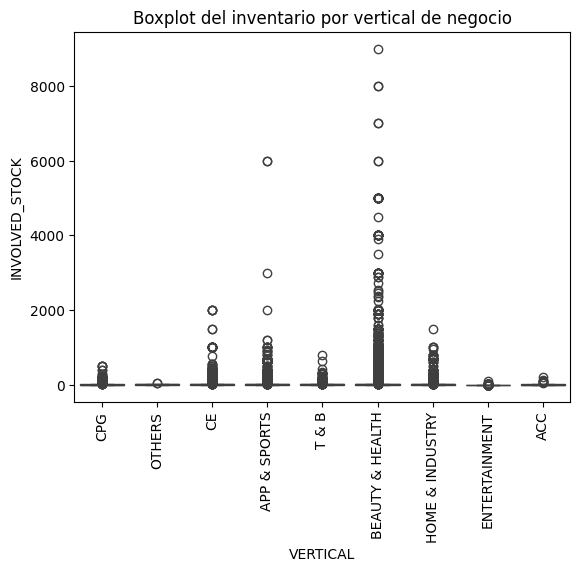

In [25]:
sns.boxplot(x=data['VERTICAL'], y=data['INVOLVED_STOCK'])
plt.xticks(rotation=90)
plt.title('Boxplot del inventario por vertical de negocio')
plt.show()

Dada la cantidad de niveles, no es fácil leer la visual generada por dominio. Preliminarmente se observa que hay una alta presencia de valores atípicos en los diferentes niveles, donde resalta "PHARMACEUTICS" por tener además un valor máximo muy superior a las demás categorías. No obstante, categorías como "APPAREL" y "BEAUTY EQUIPMENT" tienen comportamientos similares pero en menor magnitud. Esto mismo se nota al graficar por Vertical

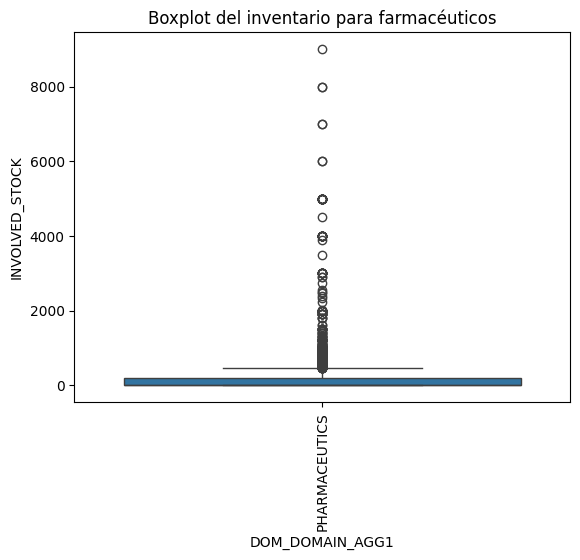

In [26]:
# Solo para farmacéuticos
data_farma = data[data['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']
sns.boxplot(x=data_farma['DOM_DOMAIN_AGG1'], y=data_farma['INVOLVED_STOCK'])
plt.xticks(rotation=90)
plt.title('Boxplot del inventario para farmacéuticos')
plt.show()

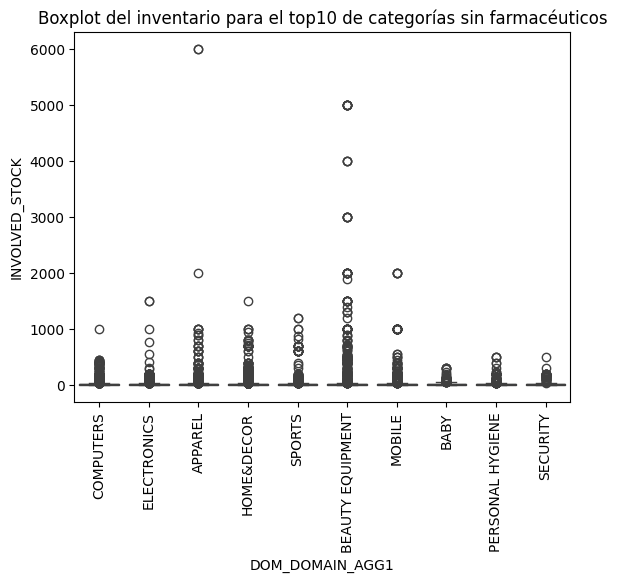

In [27]:
# Top 10 sin considerar farmacéuticos, por tema de escala
data_no_farma = data[data['DOM_DOMAIN_AGG1']!='PHARMACEUTICS']
top_10 = data_no_farma.groupby('DOM_DOMAIN_AGG1')['INVOLVED_STOCK'].mean().nlargest(10).index
data_top_10 = data[data['DOM_DOMAIN_AGG1'].isin(top_10)]

sns.boxplot(x=data_top_10['DOM_DOMAIN_AGG1'], y=data_top_10['INVOLVED_STOCK'])
plt.xticks(rotation=90)
plt.title('Boxplot del inventario para el top10 de categorías sin farmacéuticos')
plt.show()

Aun quitando farmacéuticos para analizar el top 10, se evidencia que hay ciertos ID dentro de los dominios que tienen un volumen ($) de ventas muy superior. Antes de determinar si son valores atípicos que pueden estar sesgando la muestra o generando percepciones erróneas, vale la pena analizar desde el punto de vista del negocio cómo se comportan los productos generalmente y si es algo esperado, o si definitivamente se trata de un error en los datos y sería mejor quitarlos

### 3.5 Creación de nuevas columnas

**1. Duración de las ofertas relámpago en minutos:**

In [28]:
# Minutos de diferencia entre las fechas
data['duracion_min'] = (data['OFFER_FINISH_DTTM']-data['OFFER_START_DTTM']).dt.total_seconds()/60

In [29]:
data['duracion_min'].describe()

,duracion_min
count,47820.000000
mean,342.137736
std,126.186565
min,0.000000
25%,360.000000
50%,360.033333
75%,360.166667
max,6285.150000


Se observa que hay al menos una oferta relámpago con una duración de 6,285 minutos. Esto equivale a casi 105 horas, un poco más de 4 días. Tanto la media como la mediana están alrededor de ~6 horas, por lo que el valor máximo parece ser atípico. Además, si se considera que por definición estas ofertas "tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas", una duración tan larga parece tratarse de un error en los datos

In [30]:
print(f"El percentil 99 de la duración de la oferta en minutos es {data['duracion_min'].quantile(0.99)}. \
\nLa cantidad de registros que tienen una duración superior a un día (1,440 minutos) es {data[data['duracion_min']>1440].shape[0]}")
display(data[data['duracion_min']>1440])

El percentil 99 de la duración de la oferta en minutos es 480.9. 
La cantidad de registros que tienen una duración superior a un día (1,440 minutos) es 1


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,duracion_min
42018,2021-06-05,2021-06-05 13:00:00+00:00,2021-06-09 21:45:09+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,APPAREL ACCESORIES,APP & SPORTS,MLM-SLEEPING_MASKS,6285.15


(array([3.979e+03, 4.560e+02, 6.360e+02, 7.640e+02, 8.970e+02, 1.434e+03,
        3.005e+04, 2.090e+03, 7.320e+03, 1.000e+01, 3.000e+00, 4.000e+00,
        1.720e+02, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([  0.      ,  58.571875, 117.14375 , 175.715625, 234.2875  ,
        292.859375, 351.43125 , 410.003125, 468.575   , 527.146875,
        585.71875 , 644.290625, 702.8625  , 761.434375, 820.00625 ,
        878.578125, 937.15    ]),
 <BarContainer object of 16 artists>)

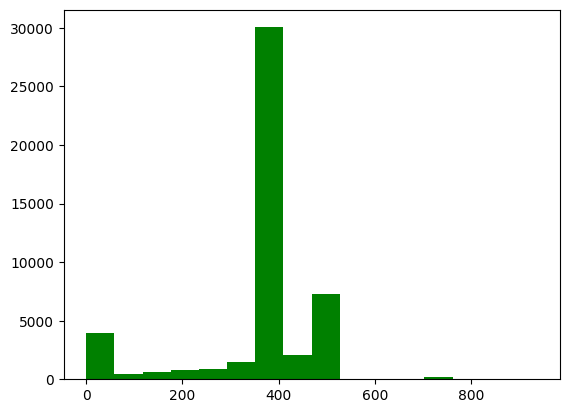

In [31]:
# Distribución de la variable, omitiendo el outlier
plt.hist(data.loc[data['duracion_min']<=1440, 'duracion_min'], bins=16, color="green")

Con base en el histograma, se evidencia que la mayoría de ofertas relámpago (alrededor de 30,000 registros) tienen una duración entre ~351 y ~410 minutos

**2. Medida de número de ventas por unidad de tiempo**

In [32]:
# Tasa de unidades vendidas por la duración de la oferta (en minutos)
data['ratio_ventas_min'] = data['SOLD_QUANTITY']/data['duracion_min']

In [33]:
data['ratio_ventas_min'].describe()

,ratio_ventas_min
count,24548.000000
mean,0.035080
std,0.135157
min,0.001136
25%,0.002778
50%,0.008331
75%,0.019439
max,5.915493


Se observa que hay al menos un producto con casi 6 unidades vendidas por minuto. Sin embargo, observando los datos hasta el percentil 75, la tasa es mucho más conservadora con un valor de 0.01944 o ~1.17 unidades por hora. Vale la pena analizar aquellos con una tasa alta (>1), ya que se puede deber a diversos factores: i) un producto con una alta demanda que estuvo disponible por poco tiempo pero vendió una imporante cantidad, ii) error en los timestamps, dando una duración mucho más corta de lo real, iii) error en las unidades vendidas, inflando la tasa

In [34]:
print(f"El percentil 99 de la tasa de ventas por unidad de tiempo es {data['ratio_ventas_min'].quantile(0.99)}. \
\nLa cantidad de registros que tienen una tasa superior a 1 (más de 1 unidad vendida por minuto) es {data[data['ratio_ventas_min']>1].shape[0]}")
display(data[data['ratio_ventas_min']>1].sort_values(by= 'ratio_ventas_min'))

El percentil 99 de la tasa de ventas por unidad de tiempo es 0.626629073856393. 
La cantidad de registros que tienen una tasa superior a 1 (más de 1 unidad vendida por minuto) es 88


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,duracion_min,ratio_ventas_min
40815,2021-06-15,2021-06-15 19:00:00+00:00,2021-06-15 19:14:58+00:00,lightning_deal,15,0,16.62,15.0,NaN,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,14.966667,1.002227
27725,2021-06-24,2021-06-24 13:00:00+00:00,2021-06-24 13:21:53+00:00,lightning_deal,15,-7,24.83,22.0,NaN,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,21.883333,1.005331
47583,2021-07-06,2021-07-06 12:00:00+00:00,2021-07-06 19:00:05+00:00,lightning_deal,748,678,1179.39,425.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,420.083333,1.011704
22240,2021-07-28,2021-07-28 12:00:00+00:00,2021-07-28 20:00:00+00:00,lightning_deal,4000,3514,973.20,491.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-OXIMETERS,480.000000,1.022917
19084,2021-07-04,2021-07-04 19:00:00+00:00,2021-07-04 19:15:36+00:00,lightning_deal,15,-1,46.50,16.0,NaN,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,15.600000,1.025641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11449,2021-07-27,2021-07-27 09:00:00+00:00,2021-07-27 17:01:05+00:00,lightning_deal,2000,497,4836.57,1503.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES,481.083333,3.124199
13737,2021-07-19,2021-07-19 13:00:00+00:00,2021-07-19 21:00:55+00:00,lightning_deal,4000,2358,4570.31,1646.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,480.916667,3.422630
13741,2021-07-19,2021-07-19 14:00:00+00:00,2021-07-19 17:48:51+00:00,lightning_deal,810,-1,2255.46,808.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,228.850000,3.530697
45648,2021-07-26,2021-07-26 22:00:00+00:00,2021-07-26 23:05:13+00:00,lightning_deal,200,-41,801.61,241.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES,65.216667,3.695374


Un factor importante al momento de analizar los datos es entender el contexto en que estos se generaron. Por ejemplo, del filtro anterior se puede observar que se presentaron altas ventas en la categoría de "PHARMACEUTICS" en productos como "SURGICAL_AND_INDUSTRIAL_MASKS" o "MLM-DISPOSABLE_GLOVES", lo cual tiene sentido dada la ventana de tiempo estudiada (2021 - pandemia)

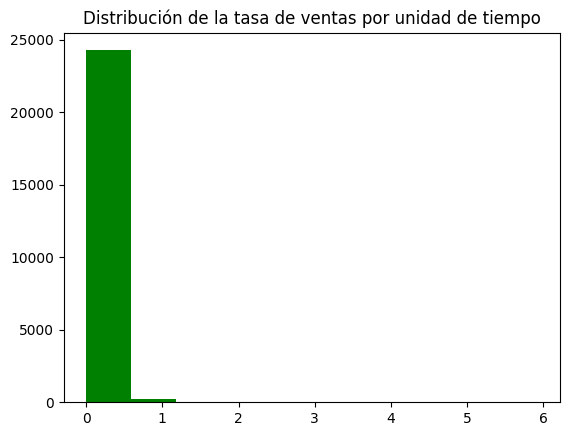

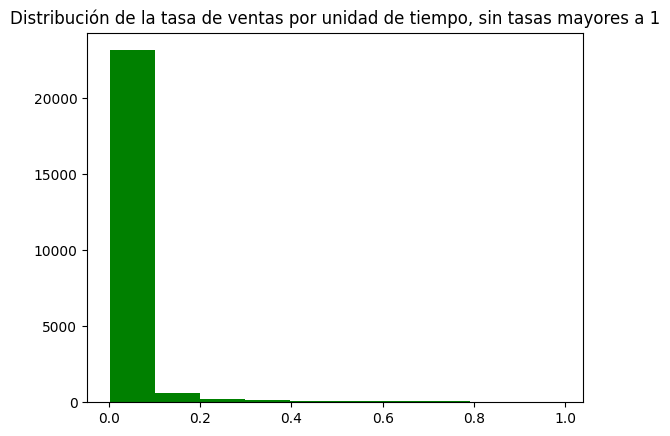

In [35]:
# Distribución de la variable
plt.hist(data['ratio_ventas_min'], color="green")
plt.title("Distribución de la tasa de ventas por unidad de tiempo")
plt.show()

# Distribución de la variable, omitiendo valores mayores a 1
plt.hist(data.loc[data['ratio_ventas_min']<=1, 'ratio_ventas_min'], color="green")
plt.title("Distribución de la tasa de ventas por unidad de tiempo, sin tasas mayores a 1")
plt.show()

**3. Revisión del stock final**

In [36]:
# Cálculo manual del inventario final, a partir de las unidades vendidas
data['inventario_final'] = data['INVOLVED_STOCK'] - data['SOLD_QUANTITY']

# Indicador de si el cálculo manual y la columna 'REMAINING_STOCK_AFTER_END' tienen el mismo valor
data['check_inventario_final'] = (data['REMAINING_STOCK_AFTER_END'] == data['inventario_final']).astype(int)

# Indicador de si el inventario final fue 0 (ventas iguales a las unidades dispuestas para la oferta)
data['stock_final_cero'] = (data['inventario_final'] == 0).astype(int)

In [37]:
data[['REMAINING_STOCK_AFTER_END', 'inventario_final', 'check_inventario_final', 'stock_final_cero']].describe()

,REMAINING_STOCK_AFTER_END,inventario_final,check_inventario_final,stock_final_cero
count,47820.000000,24548.000000,47820.000000,47820.000000
mean,30.641029,42.749796,0.451108,0.050439
std,197.270692,263.778064,0.497609,0.218852
min,-192.000000,-482.000000,0.000000,0.000000
25%,4.000000,3.000000,0.000000,0.000000
50%,8.000000,7.000000,0.000000,0.000000
75%,15.000000,13.000000,1.000000,0.000000
max,8635.000000,8634.000000,1.000000,1.000000


In [38]:
data[data['inventario_final']<=0].shape[0]/data.shape[0]

0.07634880803011293

Las estadísticas descriptivas nos permiten notar que:
* Si bien los percentiles 50, 75 y el valor máximo de 'inventario_final' y 'REMAINING_STOCK_AFTER_END' son similares en magnitud, estos no tienen la misma distribución por lo cual hay registros en donde el 'REMAINING_STOCK_AFTER_END' no se habla con el 'INVOLVED_STOCK' y el 'SOLD_QUANTITY'
  * Particularmente, solo en el 45% de los registros coincide el 'inventario_final' con el 'REMAINING_STOCK_AFTER_END', como se observa en el 'check_inventario_final'
* Tan solo el 5% de los registros tienen un stock final de 0. Sin embargo, como se vio en estadísticas previas, se tiene una cantidad importante de valores negativos en esta columna. Bajo el supuesto de que esto no es un error, sino que se registraron más ventas (bien sea por fuera de las ofertas relámpago o que se consignen 'bajo pedido' y se entreguen en cuanto se restablezca el inventario), se tendría un 7% de registros en donde se agotó el stock

## 4. Insights de la data

Ahora que se hizo un análisis exhaustivo de los datos, se puede proceder a responder preguntas de interés. Por ejemplo,

### 1. ¿Qué categorías tienen mayor éxito?

In [39]:
print(f"La definición de una categoría exitosa puede tener diferentes interpretaciones. Por ejemplo, si es por mayor cantidad \
de productos vendidos, el ganador sería {data.groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].sum().idxmax()}")
display(data.groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].sum().sort_values(ascending=False))

print(f"Si el éxito se entendiera como aquella categoría que generó más ingresos, entonces sería {data.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].sum().idxmax()}")
display(data.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].sum().sort_values(ascending=False))

print(f"Si se considerara el promedio de tasa ventas/minuto, entonces sería {data.groupby('DOM_DOMAIN_AGG1')['ratio_ventas_min'].mean().idxmax()}")
display(data.groupby('DOM_DOMAIN_AGG1')['ratio_ventas_min'].mean().sort_values(ascending=False))

print(f"Por otro lado, si se analizara la categoría con mayor tasa de veces en que el stock final es cero (sin considerar qué significan \
los inventarios finales negativos) de todas las franjas en que hubo ofertas relámpago, entonces se tendría {data.groupby('DOM_DOMAIN_AGG1')['stock_final_cero'].mean().idxmax()}")
display(data.groupby('DOM_DOMAIN_AGG1')['stock_final_cero'].mean().sort_values(ascending=False))

La definición de una categoría exitosa puede tener diferentes interpretaciones. Por ejemplo, si es por mayor cantidad de productos vendidos, el ganador sería PHARMACEUTICS


,SOLD_QUANTITY
DOM_DOMAIN_AGG1,
PHARMACEUTICS,147672.0
BEAUTY EQUIPMENT,24300.0
HOME&DECOR,18268.0
COMPUTERS,11157.0
APPAREL,7840.0
APPAREL ACCESORIES,7652.0
SPORTS,7626.0
PERSONAL CARE,6138.0
MOBILE,5498.0


Si el éxito se entendiera como aquella categoría que generó más ingresos, entonces sería PHARMACEUTICS


,SOLD_AMOUNT
DOM_DOMAIN_AGG1,
PHARMACEUTICS,440073.69
MOBILE,158429.52
ELECTRONICS,119307.41
BEAUTY EQUIPMENT,88830.25
HOME&DECOR,87754.16
COMPUTERS,83085.60
APPAREL ACCESORIES,36556.99
APPAREL,36534.20
SPORTS,33118.70


Si se considerara el promedio de tasa ventas/minuto, entonces sería PHARMACEUTICS


,ratio_ventas_min
DOM_DOMAIN_AGG1,
PHARMACEUTICS,0.189854
BEAUTY EQUIPMENT,0.101836
PETS FOOD,0.041882
CLEANING,0.026301
SPORTS,0.024012
COMPUTERS,0.023237
SECURITY,0.022024
HOME&DECOR,0.020913
INDUSTRY,0.019521


Por otro lado, si se analizara la categoría con mayor tasa de veces en que el stock final es cero (sin considerar qué significan los inventarios finales negativos) de todas las franjas en que hubo ofertas relámpago, entonces se tendría PETS FOOD


,stock_final_cero
DOM_DOMAIN_AGG1,
PETS FOOD,0.093960
BATTERIES,0.080808
PHARMACEUTICS,0.080292
CLEANING,0.078652
SECURITY,0.078125
COMPUTERS,0.070746
MOBILE,0.069274
VEHICULAR MULTIMEDIA,0.068627
WHEELS & TIRES,0.060606


In [40]:
data.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].sum().sort_values(ascending=False) / data.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].sum().sum()

,SOLD_AMOUNT
DOM_DOMAIN_AGG1,
PHARMACEUTICS,0.350293
MOBILE,0.126108
ELECTRONICS,0.094967
BEAUTY EQUIPMENT,0.070708
HOME&DECOR,0.069851
COMPUTERS,0.066135
APPAREL ACCESORIES,0.029099
APPAREL,0.029081
SPORTS,0.026362


De las tablas anteriores se puede concluir que la categoría más exitosa en las ventas relámpago para el periodo de tiempo en consideración fue 'PHARMACEUTICS'. Esto teniendo en cuenta volumen, ingresos y relación ventas vs duración de la oferta

### 2. ¿Qué factores están relacionados con una mayor conversión de ventas?

Un análisis interesante para ver si hay factores que lleven a un mayor número de ventas es tratar de identificar patrones temporales. Para esto se puede considerar el día de la semana, el momento del día en que inicia la oferta (mañana, tarde, noche) o la duración en minutosde la oferta

Análisis por día (lunes 0 - domingo 6):


,SOLD_QUANTITY
dia_semana,
1,0.180799
0,0.168235
2,0.165070
3,0.158210
4,0.142750
5,0.109126
6,0.075810


,SOLD_AMOUNT
dia_semana,
1,0.173847
2,0.162728
0,0.156499
3,0.154669
4,0.141417
5,0.123646
6,0.087193



Análisis por franja de inicio:


,SOLD_QUANTITY
franja_inicio,
tarde,0.433647
mañana,0.413495
noche,0.152858


,SOLD_AMOUNT
franja_inicio,
tarde,0.492949
mañana,0.358630
noche,0.148421



Análisis por duración de la oferta:


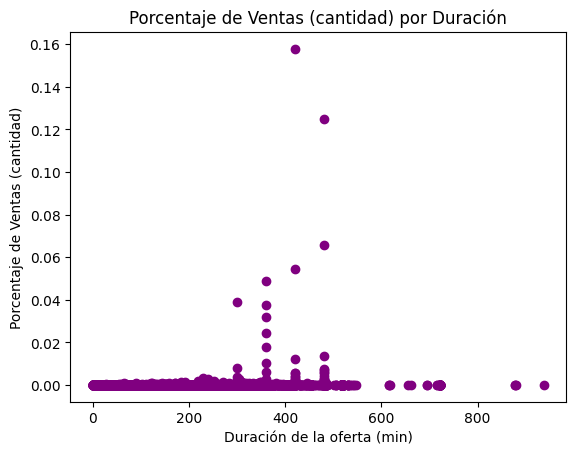

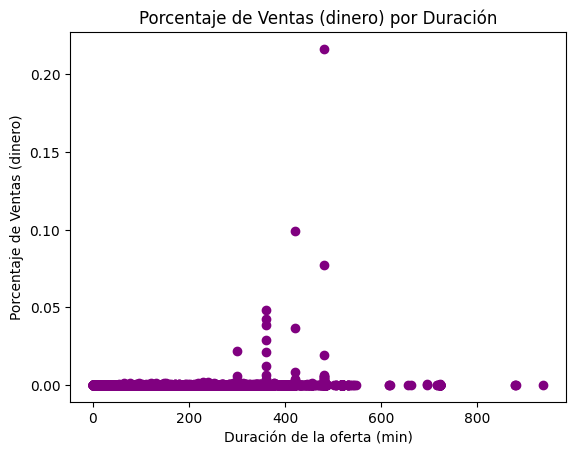

In [41]:
print("Un análisis interesante para ver si hay factores que lleven a un mayor número de ventas es tratar de identificar patrones temporales. \
Para esto se puede considerar el día de la semana, el momento del día en que inicia la oferta (mañana, tarde, noche) o la duración en minutos\
de la oferta")

data['hora_inicio'] = data['OFFER_START_DTTM'].dt.hour
data['franja_inicio'] = np.where(data['hora_inicio']<=12, 'mañana', np.where(data['hora_inicio']<=18, 'tarde', 'noche')) # Estas franjas podrían definirse de otra manera
data['dia_semana'] = data['OFFER_START_DTTM'].dt.dayofweek

print("\nAnálisis por día (lunes 0 - domingo 6):")
display(data.groupby('dia_semana')['SOLD_QUANTITY'].sum().sort_values(ascending=False) / data.groupby('dia_semana')['SOLD_QUANTITY'].sum().sum())
display(data.groupby('dia_semana')['SOLD_AMOUNT'].sum().sort_values(ascending=False) / data.groupby('dia_semana')['SOLD_AMOUNT'].sum().sum())

print("\nAnálisis por franja de inicio:")
display(data.groupby('franja_inicio')['SOLD_QUANTITY'].sum().sort_values(ascending=False) / data.groupby('franja_inicio')['SOLD_QUANTITY'].sum().sum())
display(data.groupby('franja_inicio')['SOLD_AMOUNT'].sum().sort_values(ascending=False) / data.groupby('franja_inicio')['SOLD_AMOUNT'].sum().sum())

print("\nAnálisis por duración de la oferta:")
ventas_qty_duracion = data[data['duracion_min']<1000].groupby('duracion_min')['SOLD_QUANTITY'].sum().sort_values(ascending=False) / data.groupby('duracion_min')['SOLD_QUANTITY'].sum().sum()
plt.scatter(ventas_qty_duracion.index, ventas_qty_duracion.values, color='purple')
plt.xlabel('Duración de la oferta (min)')
plt.ylabel('Porcentaje de Ventas (cantidad)')
plt.title('Porcentaje de Ventas (cantidad) por Duración')
plt.show()

ventas_amt_duracion = data[data['duracion_min']<1000].groupby('duracion_min')['SOLD_AMOUNT'].sum().sort_values(ascending=False) / data.groupby('duracion_min')['SOLD_AMOUNT'].sum().sum()
plt.scatter(ventas_amt_duracion.index, ventas_amt_duracion.values, color='purple')
plt.xlabel('Duración de la oferta (min)')
plt.ylabel('Porcentaje de Ventas (dinero)')
plt.title('Porcentaje de Ventas (dinero) por Duración')
plt.show()

* Revisando los resultados por día, no se tiene un nivel con un valor significativamente más alto que los demás. Sin embargo, sí se ve que los fines de semana (5 - sábado y 6 - domingo) las ventas son más bajas que entre semana.
* En las franjas se nota que la noche (después de las 6pm) tiene un volumen más bajo. Esto es de esperarse, pues considera momentos en que las personas están durmiendo. No obstante, valdría la pena hacer una división diferente que considere las horas hábiles del día, ya que en este momento "mañana" va desde las 12:00 am y quizá el comportamiento variaría si se considerara desde las 6:00 o 7:00 am
* No se encuentra una tendencia clara entre la duración del descuento y el porcentaje vendido. Si bien hay unos puntos más altos cercanos a los ~500 minutos, estos son puntos aislados y no un patrón identificable

In [42]:
print("Finalmente, se revisa si hay relación entre el envío gratis y las ventas:")
display(data.groupby('SHIPPING_PAYMENT_TYPE')['SOLD_QUANTITY'].sum().sort_values(ascending=False))
display(data.groupby('SHIPPING_PAYMENT_TYPE')['SOLD_AMOUNT'].sum().sort_values(ascending=False))

Finalmente, se revisa si hay relación entre el envío gratis y las ventas:


,SOLD_QUANTITY
SHIPPING_PAYMENT_TYPE,
none,202349.0
free_shipping,64278.0


,SOLD_AMOUNT
SHIPPING_PAYMENT_TYPE,
free_shipping,746208.83
none,510094.41


De estas tablas se puede observar que la cantidad de productos comprados durante las ofertas relámpago sin envío gratis fue mayor que aquellas que sí lo ofrecian; sin embargo, al verlo en dinero la proporción cambia. Esto podría deberse a que los productos de mayor valor suelen tener el beneficio de envío sin costo. De igual manera, podría analizarse desde otro punto de vista del negocio para entender si hay una relación más profunda o directa

**NOTA:** Si bien existen librerías como _ydata_profiling_ que crean reportes automáticos para el EDA, se tomó la decisión de hacerlo manual por la naturaleza del ejercicio y por la flexibilidad al momento de tener las visuales (ejemplo, los gráficos de las variables numéricas que se probaron hasta el percentil 98 o 95)

In [43]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport
# ProfileReport(data_original)